In [ ]:
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.7/224.7 kB 3.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [4]:
import pandas as pd
import numpy as np

from sentence_transformers import SentenceTransformer, models

# Define the model name for Indonesian sentiment analysis
model_name = 'ayameRushia/bert-base-indonesian-1.5G-sentiment-analysis-smsa'
model = SentenceTransformer(model_name)

No sentence-transformers model found with name C:\Users\aida hf/.cache\torch\sentence_transformers\ayameRushia_bert-base-indonesian-1.5G-sentiment-analysis-smsa. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at C:\Users\aida hf/.cache\torch\sentence_transformers\ayameRushia_bert-base-indonesian-1.5G-sentiment-analysis-smsa were not used when initializing BertModel: ['classifier.weight', 'classifier.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [3]:

df = pd.read_csv("SentenceBert Social Media Dataset.csv")


df

,comments,sosmed,label
0,ada calon presiden miskin jangan percaya buka...,instagram,1
1,c1 palsu mau jujur,instagram,2
2,sidang mahkamah agung milu tahun berapa kayak...,instagram,2
3,benar banget bu,instagram,0
4,krakyat indonesiam berkas via email sekira apa...,instagram,2
...,...,...,...
940,rawan prabowogibran nyala 1000 lilin seru milu...,X,2
941,video 1 saiful mujani blakan kait koalisi prab...,X,3
942,prabowogibran harus kalah bagai pelsssajaran b...,X,3
943,menit ke 32 ada anak kecil langsung peluk aya...,X,0


In [ ]:
data = df["comments"].tolist()

In [ ]:
from tqdm import tqdm
arr = model.encode(data[0]).reshape(1, -1)
for i in tqdm(range(len(data[1:])), "Sentence Embedding"):
    brr = model.encode(data[i])
    arr = np.concatenate((arr, brr.reshape(1, -1)), axis=0)

Sentence Embedding: 100%|██████████| 944/944 [02:44<00:00,  5.73it/s]


In [ ]:
print(arr.shape)

(945, 768)


In [ ]:
 data

[' ada calon presiden miskin jangan percaya bukan panutan   kita butuh panutan kaya  kerja keras  cocoke patuh',
 ' c1 palsu  mau jujur',
 ' sidang mahkamah agung milu tahun berapa kayak bukan sekarang',
 'benar banget bu',
 'krakyat indonesiam berkas via email sekira apa krakyat indonesiarakyat indonesiamahkamah agung dalam 3 rantidakap juga min',
 'selbanget andal golkar semua',
 'semangat nyala abah ku',
 'memang rakyat indonesiantah tidak mau anis ja persiden mau nya anak persiden pertama ja wakil terus ja persiden rakyat indonesiatahan tidak rela proyek nya kelola orang lain mau nya anak nya coba liat saja keluargaa masukin ke rakyat indonesiantahan bapak anak mantu om nama nya rakyat indonesiantahan punya keluargaa bukan buat rakayat ja orang2 cerdas tidak bisa kalau keluarga tidak seleksi enak banget coba mikir rakayat cerdas',
 'salam ngabisi mat senmasih 02 lantik',
 'nyala 2024',
 'jangan bawa2 politik orang musibah bawa2 politik kita harap agar rakyat indonesiantah bisa tati

In [ ]:
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.metrics import silhouette_score as ss

In [ ]:
pca = PCA(n_components=2)
result = pca.fit_transform(arr)

In [ ]:
result

array([[ -3.9221928,  -7.6338096],
       [ -3.9221764,  -7.633836 ],
       [  2.7129903,  -6.951699 ],
       ...,
       [ 10.311628 ,  13.716226 ],
       [-16.84904  ,  -7.1933336],
       [ 10.155471 ,  -4.050639 ]], dtype=float32)

<ipython-input-11-26ab80e34bd2>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=[X[0] for X in result],


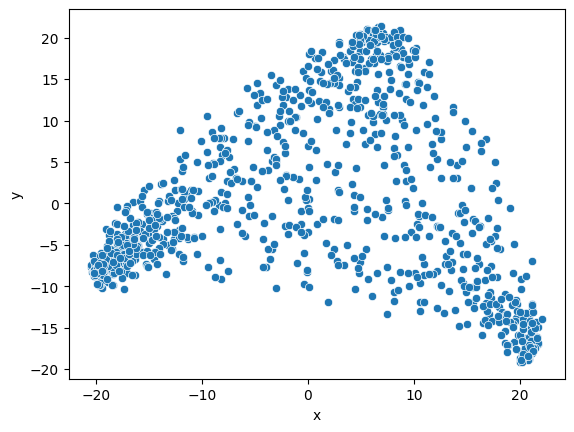

In [ ]:
sns.scatterplot(x=[X[0] for X in result],
                y=[X[1] for X in result],
                palette="deep",
                legend=None
                )
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [ ]:
df

,comments,sosmed,label
0,ada calon presiden miskin jangan percaya buka...,instagram,1
1,c1 palsu mau jujur,instagram,2
2,sidang mahkamah agung milu tahun berapa kayak...,instagram,2
3,benar banget bu,instagram,0
4,krakyat indonesiam berkas via email sekira apa...,instagram,2
...,...,...,...
940,rawan prabowogibran nyala 1000 lilin seru milu...,X,2
941,video 1 saiful mujani blakan kait koalisi prab...,X,3
942,prabowogibran harus kalah bagai pelsssajaran b...,X,3
943,menit ke 32 ada anak kecil langsung peluk aya...,X,0


In [ ]:
clustering = DBSCAN(eps=0.1, min_samples=5).fit(arr)

In [ ]:
df['cluster'] = clustering.labels_
df

,comments,sosmed,label,cluster
0,ada calon presiden miskin jangan percaya buka...,instagram,1,-1
1,c1 palsu mau jujur,instagram,2,-1
2,sidang mahkamah agung milu tahun berapa kayak...,instagram,2,-1
3,benar banget bu,instagram,0,-1
4,krakyat indonesiam berkas via email sekira apa...,instagram,2,-1
...,...,...,...,...
940,rawan prabowogibran nyala 1000 lilin seru milu...,X,2,-1
941,video 1 saiful mujani blakan kait koalisi prab...,X,3,-1
942,prabowogibran harus kalah bagai pelsssajaran b...,X,3,-1
943,menit ke 32 ada anak kecil langsung peluk aya...,X,0,-1


In [ ]:
pca = PCA(n_components=2)
result = pca.fit_transform(arr)
x = result[:, 0]
y = result[:, 1]
fig = px.scatter(x=x, y=y, color=df['cluster'])
fig.show()
label_counts = df['cluster'].value_counts()
print("Sum of labels in scatter plot:", label_counts)

Sum of labels in scatter plot: cluster
-1    945
Name: count, dtype: int64


In [ ]:
epsilon = np.linspace(0.1,1,num=7)
epsilon
min_samples = np.arange(2,10,step=3)
min_samples

array([2, 5, 8])

In [ ]:
import itertools
combinations = list(itertools.product(epsilon,min_samples))
combinations

[(0.1, 2),
 (0.1, 5),
 (0.1, 8),
 (0.25, 2),
 (0.25, 5),
 (0.25, 8),
 (0.4, 2),
 (0.4, 5),
 (0.4, 8),
 (0.5499999999999999, 2),
 (0.5499999999999999, 5),
 (0.5499999999999999, 8),
 (0.7, 2),
 (0.7, 5),
 (0.7, 8),
 (0.85, 2),
 (0.85, 5),
 (0.85, 8),
 (1.0, 2),
 (1.0, 5),
 (1.0, 8)]

In [ ]:
all_parameters = []

def get_scores_and_labels(combinations, arr):
    scores = []
    all_labels_list = []
    n = len(combinations)  # Added to get the number of combinations for print statements
    for i, (eps, num_samples) in enumerate(combinations):
        clustering = DBSCAN(eps=eps, min_samples=num_samples).fit(arr)
        labels = clustering.labels_
        labels_set = set(labels)
        num_clusters = len(labels_set)
        if -1 in labels_set:
            num_clusters -= 1
        if (num_clusters < 2) or (num_clusters > 50):
            scores.append(-10)
            all_labels_list.append("bad")
            c = (eps, num_samples)
            print(f"combination {c} on iteration {i+1} of {n} has {num_clusters} clusters. next!")
            continue
        ss_val = ss(arr, labels)
        outliers = np.sum(labels == -1)
        scores.append(ss_val)
        all_labels_list.append(labels)
        parameters = {
            'epsilon': eps,
            'min_samples': num_samples,
            'score': ss_val,
            'num_clusters': num_clusters,
            'outliers': outliers
        }
        all_parameters.append(parameters)
        print(f"index {i}, score: {scores[-1]}, labels: {all_labels_list[-1]}, numClusters: {num_clusters}")
        parameters
    best_index = np.argmax(scores)
    best_parameters = combinations[best_index]
    best_labels = all_labels_list[best_index]
    best_scores = scores[best_index]
    return {
        'best_epsilon': best_parameters[0],
        'best_min_samples': best_parameters[1],
        'best_labels': best_labels,
        'best_score': best_scores
    }

best_dic = get_scores_and_labels(combinations,arr)

index 0, score: -0.29342642426490784, labels: [ 0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -

In [ ]:
pr = pd.DataFrame(all_parameters)
pr

,epsilon,min_samples,score,num_clusters,outliers
0,0.10,2,-0.293426,4,937
1,0.25,2,-0.293426,4,937
2,0.40,2,-0.293426,4,937
3,0.55,2,-0.293426,4,937
4,0.70,2,-0.293426,4,937
5,0.85,2,-0.293426,4,937
6,1.00,2,-0.293426,4,937


In [ ]:
best_dic

{'best_epsilon': 0.1,
 'best_min_samples': 2,
 'best_labels': array([ 0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1,

In [ ]:
df['cluster'] = best_dic['best_labels']
df['cluster'].value_counts()

cluster
-1    937
 0      2
 1      2
 2      2
 3      2
Name: count, dtype: int64

In [ ]:
pca = PCA(n_components=2)
result = pca.fit_transform(arr)
x = result[:, 0]
y = result[:, 1]
fig = px.scatter(x=x, y=y, color=df['cluster'])
fig.show()
label_counts = df['cluster'].value_counts()
print("Sum of labels in scatter plot:", label_counts)

Sum of labels in scatter plot: cluster
-1    937
 0      2
 1      2
 2      2
 3      2
Name: count, dtype: int64


In [ ]:
labels = df['cluster']
# labels
clusters = {}
for label in set(labels):
    clusters[label] = df[df['cluster'] == label]['comments'].tolist()


# Verifikasi hasil
print(clusters[1])


['ahok dengar suara anies adu merdu su', 'etidakk bagi tiket elektronik kampanye akbar jis tetap datang sssaja ingat saksi kejaan kemarin ada orang mentidaku dukung 02 sengsssaja borong tiket elektronik desak anies agar teman2 ga bagi tiket  dengan batidaknya cerita x land']


In [ ]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary

def apply_lda_to_clusters(clusters, num_topics):
    lda_models = {}
    for label, documents in clusters.items():
        print(f"Processing cluster {label} with {len(documents)} documents")
        if len(documents) == 0:
            print(f"Skipping cluster {label} because it is empty")
            continue
        tokenized_docs = [doc.split() for doc in documents]
        dictionary = Dictionary(tokenized_docs)
        if len(dictionary) == 0:
            print(f"Skipping cluster {label} because dictionary is empty")
            continue
        corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]
        if len(corpus) == 0:
            print(f"Skipping cluster {label} because corpus is empty")
            continue  # Skip clusters with empty corpus
        # Melatih model LDA
        lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)
        lda_models[label] = {
            'lda_model': lda_model,
            'corpus': corpus,
            'dictionary': dictionary
        }
        print(f"Finished processing cluster {label}")
    return lda_models

# Terapkan LDA pada setiap kelompok dokumen
num_topics = 1
lda_models = apply_lda_to_clusters(clusters, num_topics=num_topics)


Processing cluster 0 with 2 documents
Finished processing cluster 0
Processing cluster 1 with 2 documents
Finished processing cluster 1
Processing cluster 2 with 2 documents
Finished processing cluster 2
Processing cluster 3 with 2 documents
Finished processing cluster 3
Processing cluster -1 with 937 documents
Finished processing cluster -1


In [ ]:
!pip install wordcloud

Topik untuk kluster 0:
Topik 0: panutan (0.076923095), kita (0.051282052), jujur (0.051282052), c1 (0.051282052), calon (0.051282052), presiden (0.051282048), percaya (0.051282048), patuh (0.051282048), miskin (0.051282048), ada (0.051282048), kerja (0.051282048), keras (0.051282048), kaya (0.051282048), jangan (0.051282048), cocoke (0.051282048), butuh (0.051282048), bukan (0.051282048), mau (0.051282048), palsu (0.051282048)


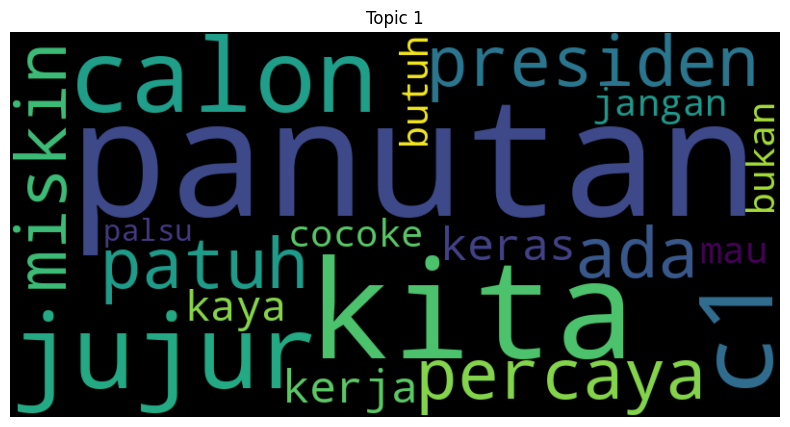



Topik untuk kluster 1:
Topik 0: tiket (0.050632954), elektronik (0.037974700), anies (0.037974700), bagi (0.037974697), etidakk (0.025316449), ga (0.025316449), ingat (0.025316449), jis (0.025316449), kampanye (0.025316449), kejaan (0.025316449), adu (0.025316449), mentidaku (0.025316449), orang (0.025316449), saksi (0.025316449), sengsssaja (0.025316449), sssaja (0.025316449), teman2 (0.025316449), tetap (0.025316449), kemarin (0.025316449), land (0.025316449), dukung (0.025316449), dengan (0.025316449), datang (0.025316449), cerita (0.025316449), borong (0.025316449), batidaknya (0.025316449), akbar (0.025316449), agar (0.025316449), ada (0.025316449), 02 (0.025316449), suara (0.025316449), su (0.025316449), merdu (0.025316449), dengar (0.025316449), ahok (0.025316449), desak (0.025316449), x (0.025316449)


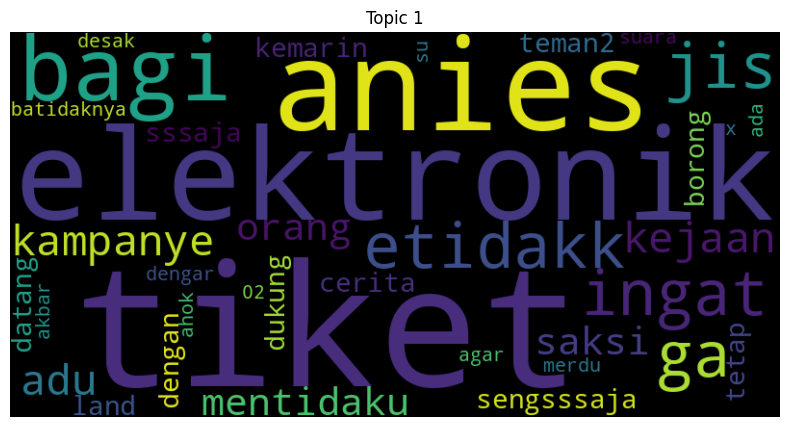



Topik untuk kluster 2:
Topik 0: cak (0.044117667), imin (0.044117667), kayak (0.044117667), mahasiswa (0.044117667), ada (0.029411761), gratis (0.029411761), ja (0.029411761), masih (0.029411761), niat (0.029411761), pas (0.029411761), dengan (0.029411761), seminar (0.029411761), souvenirnya (0.029411761), suka (0.029411761), tipikal (0.029411761), nyari (0.029411761), dapetin (0.029411761), walaupun (0.029411761), ugm (0.029411761), tulis (0.029411761), tidak (0.029411761), silinder (0.029411761), seluruslurusnya (0.029411761), petidakris (0.029411761), nang (0.029411761), lurus (0.029411761), liat (0.029411761), kertas (0.029411761), gue (0.029411761), garis (0.029411761), buat (0.029411761), utama (0.029411761)


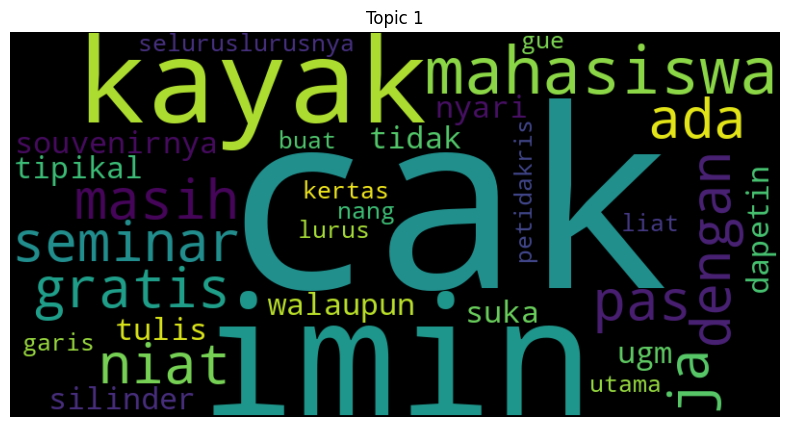



Topik untuk kluster 3:
Topik 0: rombong (0.056603801), ngerti (0.037735853), lilin (0.037735853), duit (0.037735853), susah (0.037735853), mana (0.037735853), saat (0.037735853), prabowogibran (0.037735850), nyala (0.037735850), milu (0.037735850), damai (0.037735850), 1000 (0.037735850), video (0.037735850), bagaimana (0.037735850), rawan (0.037735850), mereka (0.037735850), lagi (0.037735850), horang2 (0.037735850), hidup (0.037735850), deh (0.037735850), coba (0.037735850), bung (0.037735850), bak (0.037735850), bain (0.037735850), nih (0.037735850), seru (0.037735850)


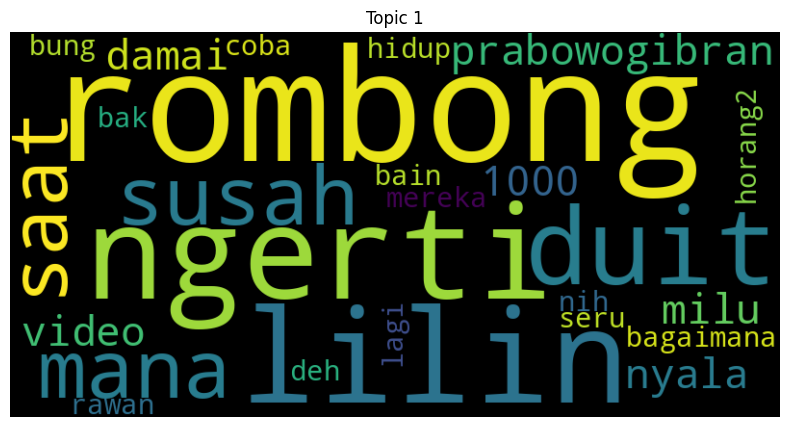



Topik untuk kluster -1:
Topik 0: pak (0.012297408), anies (0.009805390), indonesia (0.008342703), tidak (0.008071837), ja (0.006825835), rakyat (0.006284084), ada (0.006229902), ganjar (0.005417293), dukung (0.004983905), untuk (0.004983902), ya (0.004767201), pilih (0.004550511), presiden (0.004496343), sama (0.004442170), saya (0.004387993), dengan (0.004279649), prabowo (0.004171293), juga (0.003900423), bisa (0.003629546), imin (0.003575375), orang (0.003521206), cawapres (0.003358687), mahfud (0.003358676), ke (0.003304510), gibran (0.003250334), tapi (0.003250334), cak (0.003250333), capres (0.003196163), paslon (0.003196158), mau (0.003087809), kita (0.003033635), kalau (0.003033633), ga (0.002979467), nya (0.002979461), a (0.002925291), bukan (0.002925290), baik (0.002871118), satu (0.002871117), bapak (0.002871115), dari (0.002762765), 02 (0.002762763), menang (0.002708593), jokowi (0.002708593), apa (0.002600244), jangan (0.002600243), akan (0.002546074), mereka (0.00254606

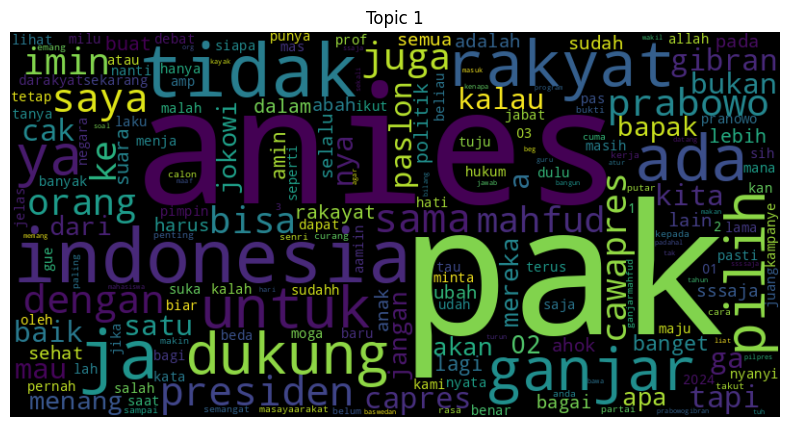

In [ ]:
from wordcloud import WordCloud

def display_topics_and_wordcloud(lda_model, num_topics, num_words=10):
    for topic_num in range(num_topics):
        topic_words = lda_model.show_topic(topic_num, topn=num_words)
        topic_words_str = ", ".join([f"{word} ({prob:.9f})" for word, prob in topic_words])
        print(f"Topik {topic_num}: {topic_words_str}")
        word_freq = {word: prob for word, prob in topic_words}
        wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(word_freq)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Topic {topic_num + 1}')
        plt.show()

# Penggunaan:
for label, model_info in lda_models.items():
    print(f"Topik untuk kluster {label}:")
    display_topics_and_wordcloud(model_info['lda_model'], num_topics=num_topics, num_words=900)
    print("\n")

In [ ]:
cluster_distribution = df.groupby(['sosmed', 'cluster']).size().unstack(fill_value=0)
print(cluster_distribution)

In [ ]:
cluster_counts = cluster_distribution.stack().reset_index(name='count')
print(cluster_counts)

In [ ]:
df

NameError: name 'df' is not defined

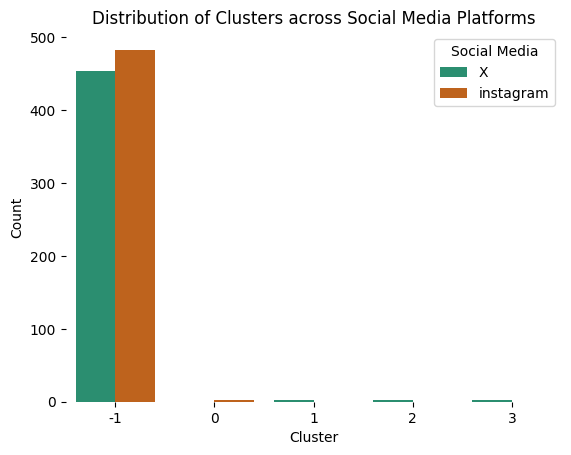

In [ ]:
# figsize = (12, 1.2 * len(df['sosmed'].unique()))
# plt.figure(figsize=figsize)
# sns.violinplot(df, x='cluster', y='sosmed', inner='box', palette='Dark2')
# sns.despine(top=True, right=True, bottom=True, left=True)

sns.barplot(data=cluster_counts, x='cluster', y='count', hue='sosmed', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.title('Distribution of Clusters across Social Media Platforms')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Social Media', loc='upper right')
plt.show()